## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

[Data Source](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?resource=download)

### Import Data & Libraries 

In [1]:
# importing required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression


df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
#impot dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,1,1,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,1,1,1,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,3,1,1,1,2,1,1,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,1,2,3,2,1,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,1,2,3,3,1,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data cleaning

In [2]:
#checking the datatype of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
# checking missing values 
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [39]:
#function to encoding categorical variables using Label Encoding 



def encode (column):
    dec_val = []
    sett = ()
    sett = df[column]
    sett = sett.unique()
    
 
    for i in range (0, len(df)):
        for j in range (0,len(sett)):
            if df[column][i]== sett[j]:
                #df[column][i] = j+1
                dec_val.append(j+1) 
    #df[column]=  dec_val
    return dec_val
               


In [40]:
# Encoding all categrical variables 
df["CarName"] = encode ("CarName")
df["fueltype"] = encode ("fueltype")
df["aspiration"] = encode ("aspiration")
df["carbody"] = encode ("carbody")
df["doornumber"] = encode ("doornumber")
df["drivewheel"] = encode ("drivewheel")
df["enginelocation"] = encode ("enginelocation")
df["enginetype"] = encode ("enginetype")
df["cylindernumber"] = encode ("cylindernumber")
df["fuelsystem"] = encode ("fuelsystem")

### Explonatory Data analysis using Data Visualizatio

<AxesSubplot:>

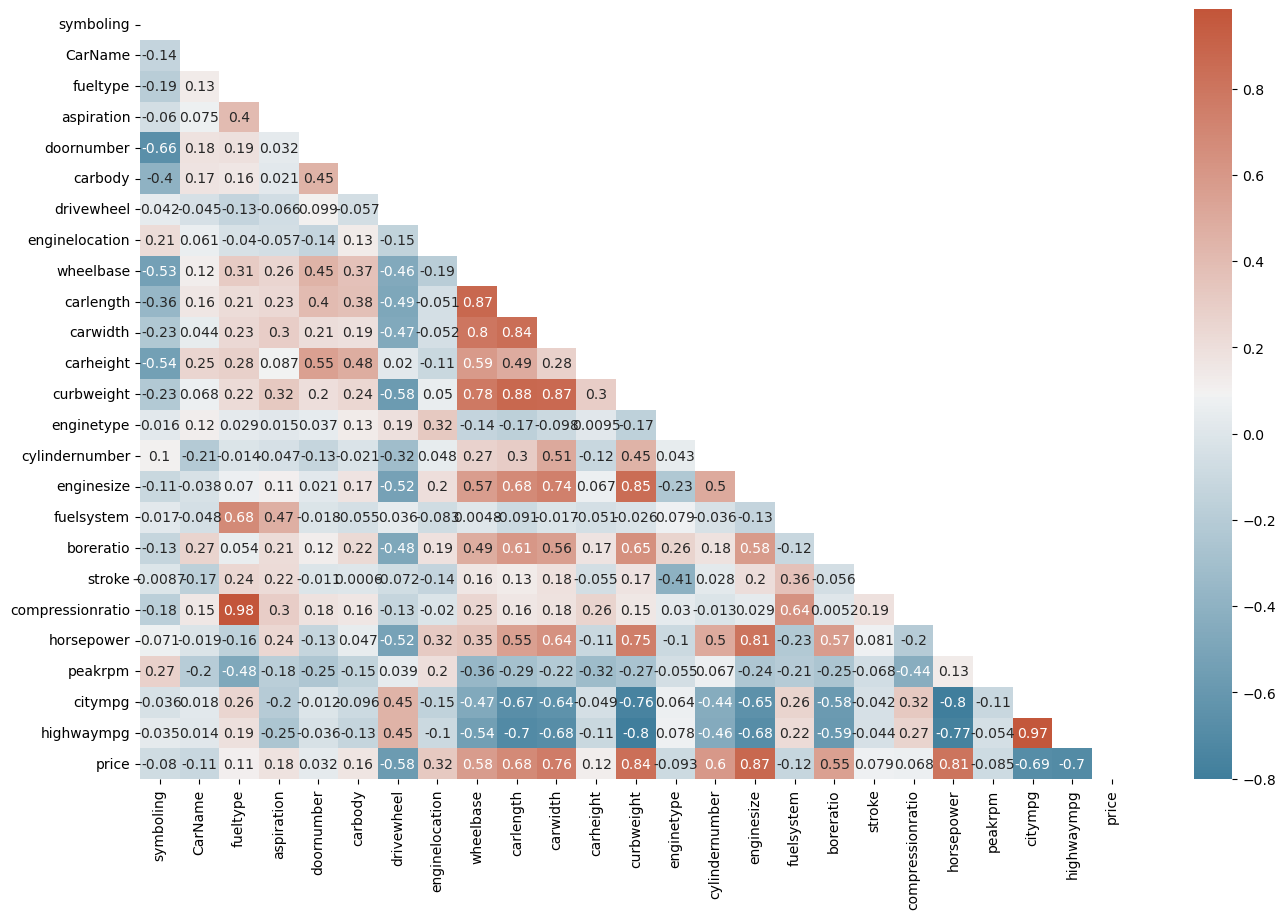

In [87]:
del df['car_ID']
corr = df.corr()
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


In [90]:
#sns.pairplot(df)

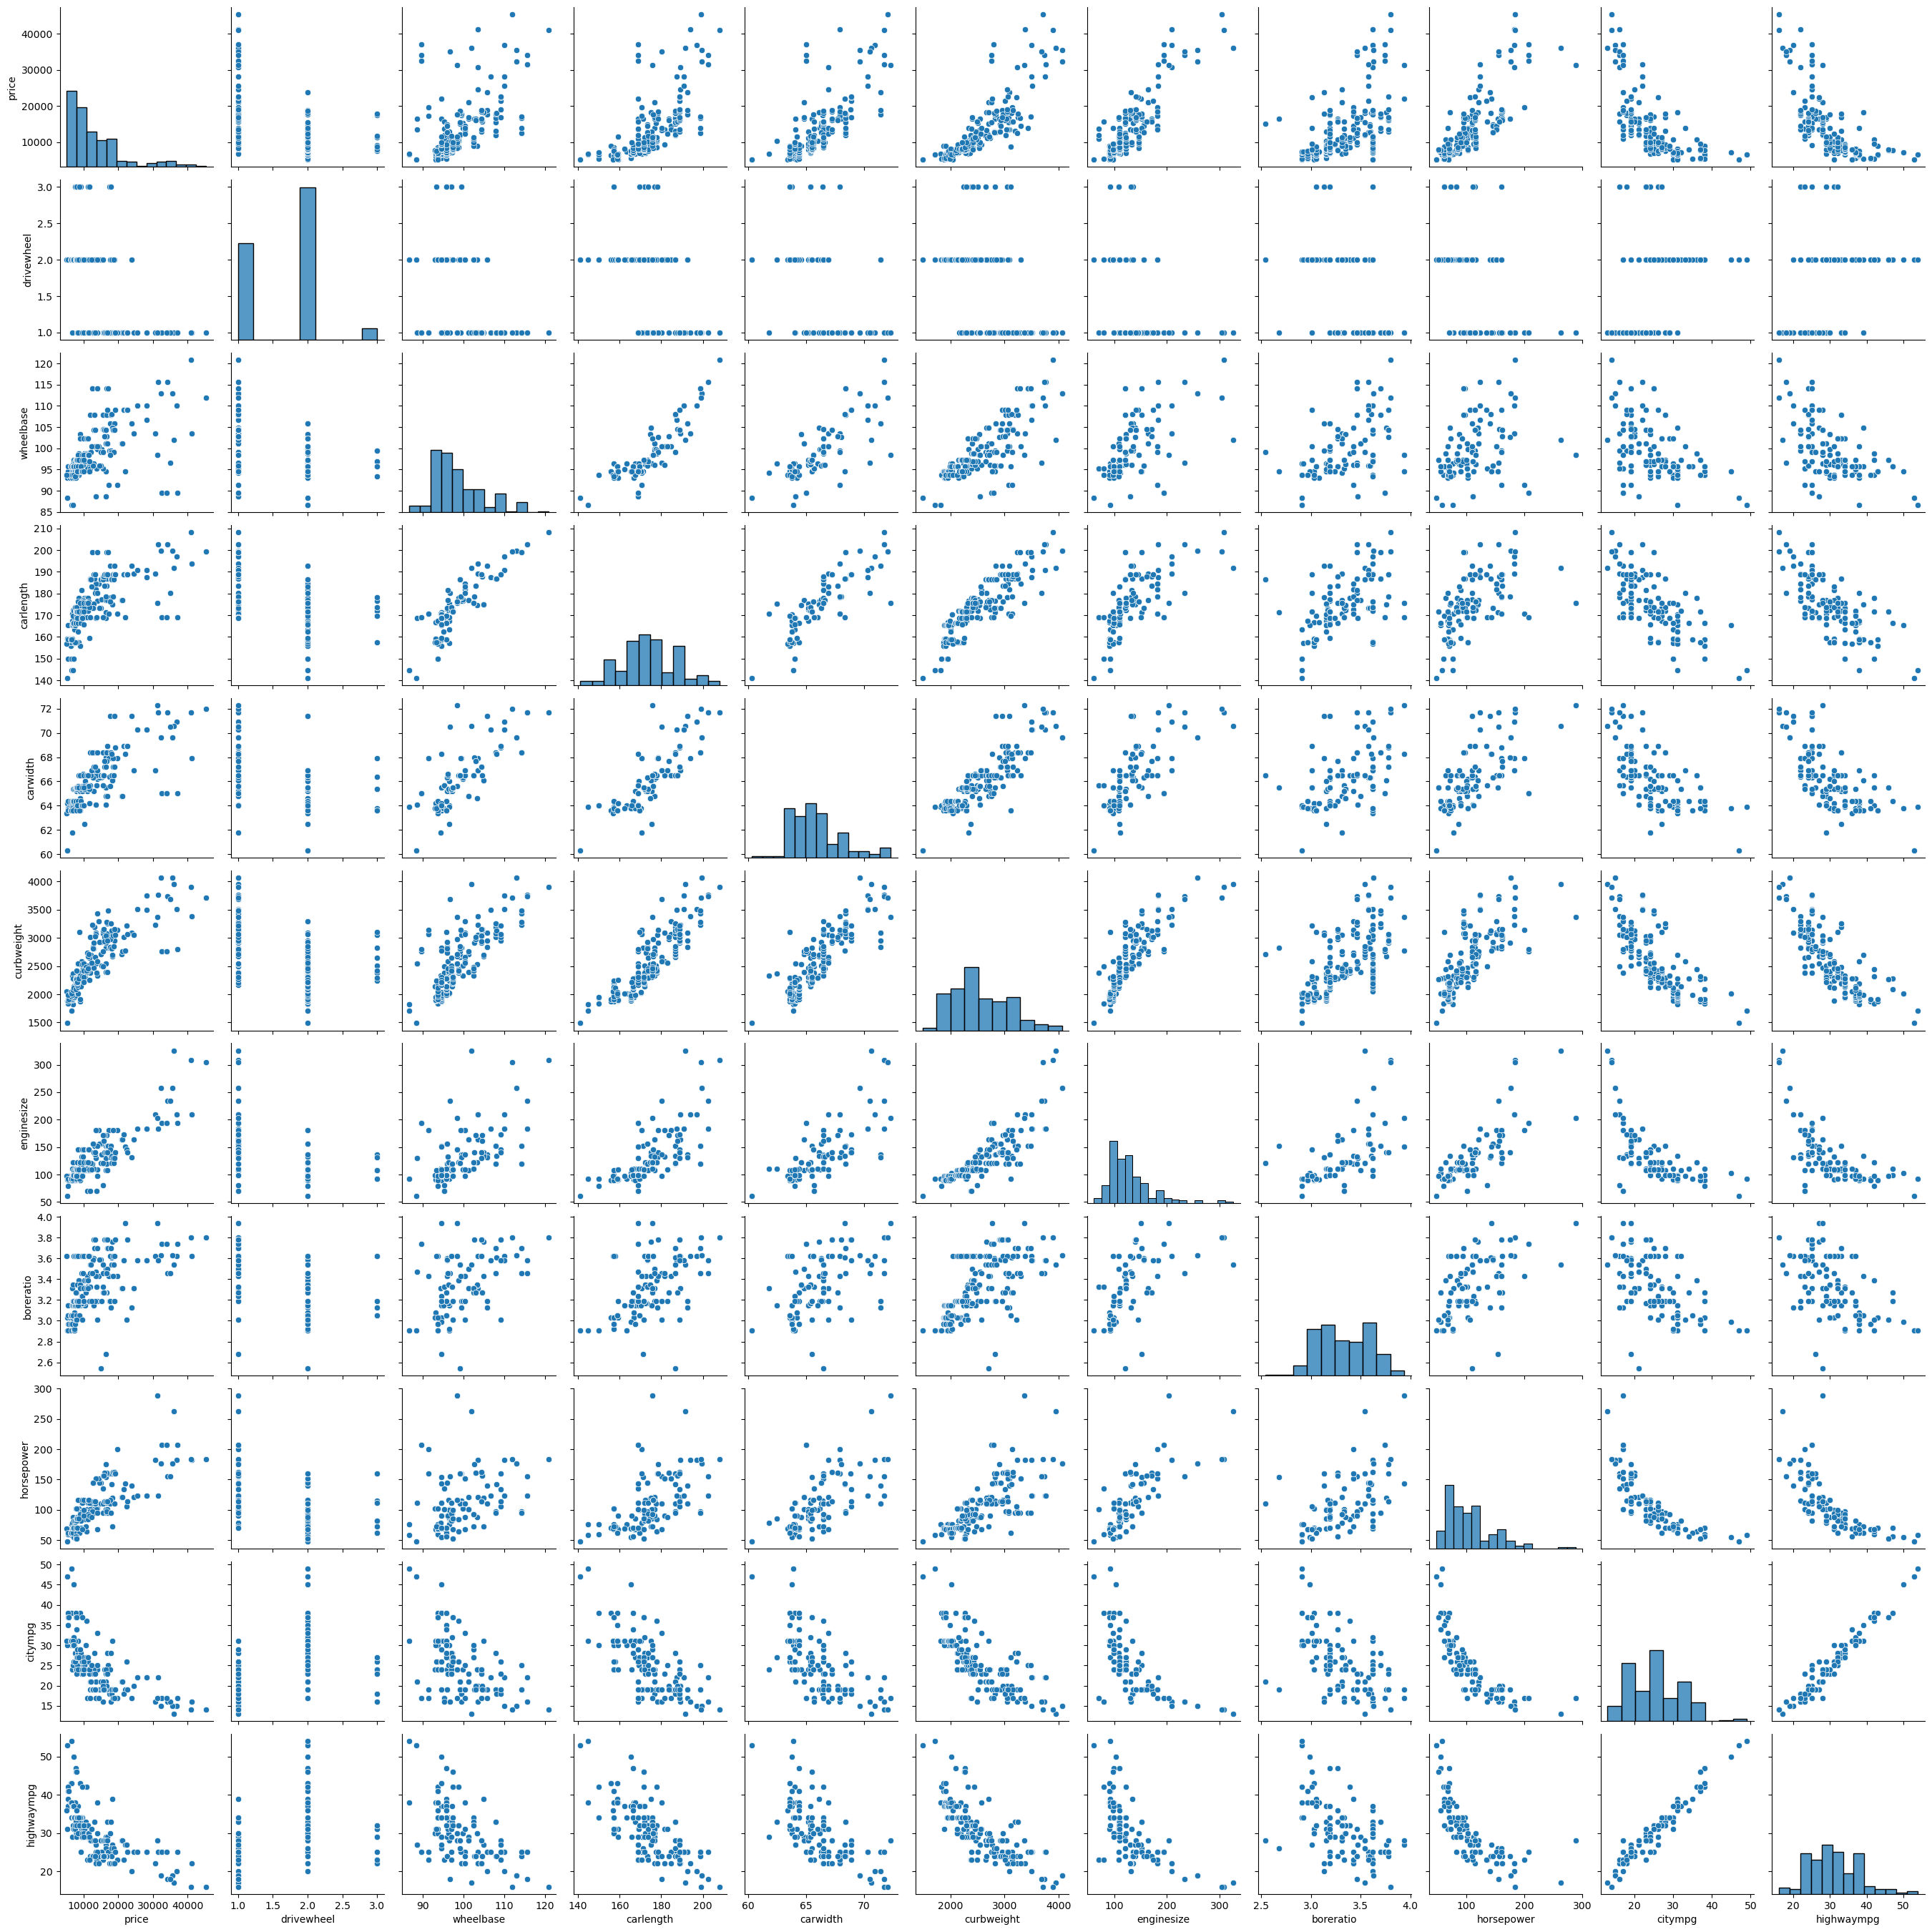

In [89]:
sns.pairplot(
    df,
    x_vars=["price", "drivewheel", "wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio", "horsepower", "citympg","highwaympg"],
    y_vars=["price", "drivewheel", "wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio", "horsepower", "citympg","highwaympg"],

)

### Modeling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler


#### Before Principal compoment Analysis 

In [41]:
#Defined X value and y value , and split the data train

X = df.drop(columns="price")           
y = df["price"]    # y = price

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)



print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape) 


X Train :  (143, 25)
X Test  :  (62, 25)
Y Train :  (143,)
Y Test  :  (62,)


In [50]:
X_train.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
79,80,1,66,1,2,1,2,2,1,93.0,...,1,98,8,3.03,3.39,7.6,102,5500,24,30
2,3,1,3,1,1,1,2,1,1,94.5,...,2,152,1,2.68,3.47,9.0,154,5000,19,26
180,181,-1,125,1,1,2,3,1,1,104.5,...,2,171,1,3.27,3.35,9.2,156,5200,20,24
157,158,0,115,1,1,2,2,2,1,95.7,...,1,98,2,3.19,3.03,9.0,70,4800,30,37
154,155,0,117,1,1,2,4,3,1,95.7,...,1,92,2,3.05,3.03,9.0,62,4800,27,32


In [42]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
XGB = XGBRegressor()

In [43]:

model = [LR,DTR,RFR,KNR,XGB]
d = {}
for i in model:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 89.97392525908425
DecisionTreeRegressor() : 84.76394704034101
RandomForestRegressor() : 94.48622899003615
KNeighborsRegressor() : 86.8398285103432
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 93.53674114872685


### After PCA



In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [13]:
# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

In [15]:
pca.fit(X_train)

PCA(n_components=0.95)

In [16]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [17]:
model = [LR,DTR,RFR,KNR,XGB]
d = {}
for i in model:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 90.07600264441581
DecisionTreeRegressor() : 89.7273912845646
RandomForestRegressor() : 83.1346196566297
KNeighborsRegressor() : 84.48044596986271
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 84.42529664064283


In [45]:
arr = [1,3,1,1,1,1,1,1,1,88.60,168.8, 64,48.90,2548,1,1,130,1,3.47,2.68,9,111,5000,21,27]
LR.predict(X_train[0].reshape(1,-1))

KeyError: 0

### Pickling The model File For Deplyoment 

In [46]:
import pickle

In [47]:
pickle.dump(LR, open("regmodel.pkl", "wb"))

In [48]:
pickled_model = pickle.load(open("regmodel.pkl", "rb"))

In [51]:
X_train[0].reshape(1,-1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
79,80,1,66,1,2,1,2,2,1,93.0,...,1,98,8,3.03,3.39,7.6,102,5500,24,30
2,3,1,3,1,1,1,2,1,1,94.5,...,2,152,1,2.68,3.47,9.0,154,5000,19,26
180,181,-1,125,1,1,2,3,1,1,104.5,...,2,171,1,3.27,3.35,9.2,156,5200,20,24
157,158,0,115,1,1,2,2,2,1,95.7,...,1,98,2,3.19,3.03,9.0,70,4800,30,37
154,155,0,117,1,1,2,4,3,1,95.7,...,1,92,2,3.05,3.03,9.0,62,4800,27,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,0,14,1,1,2,3,1,1,103.5,...,2,209,1,3.62,3.39,8.0,182,5400,16,22
182,183,2,130,2,1,1,3,2,1,97.3,...,1,97,7,3.01,3.40,23.0,52,4800,37,46
99,100,0,72,1,1,2,2,2,1,97.2,...,1,120,2,3.33,3.47,8.5,97,5200,27,34
199,200,-1,146,1,2,2,4,1,1,104.3,...,1,130,1,3.62,3.15,7.5,162,5100,17,22


In [55]:
X_train.iloc[0]

car_ID                80.00
symboling              1.00
CarName               66.00
fueltype               1.00
aspiration             2.00
doornumber             1.00
carbody                2.00
drivewheel             2.00
enginelocation         1.00
wheelbase             93.00
carlength            157.30
carwidth              63.80
carheight             50.80
curbweight          2145.00
enginetype             3.00
cylindernumber         1.00
enginesize            98.00
fuelsystem             8.00
boreratio              3.03
stroke                 3.39
compressionratio       7.60
horsepower           102.00
peakrpm             5500.00
citympg               24.00
highwaympg            30.00
Name: 79, dtype: float64

In [79]:

pickled_model.predict (n.reshape(1, -1))

/Users/mshyaka@unomaha.edu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6951.54648656])

In [75]:
n= np.array(X_train.iloc[0])

In [76]:
n

array([8.000e+01, 1.000e+00, 6.600e+01, 1.000e+00, 2.000e+00, 1.000e+00,
       2.000e+00, 2.000e+00, 1.000e+00, 9.300e+01, 1.573e+02, 6.380e+01,
       5.080e+01, 2.145e+03, 3.000e+00, 1.000e+00, 9.800e+01, 8.000e+00,
       3.030e+00, 3.390e+00, 7.600e+00, 1.020e+02, 5.500e+03, 2.400e+01,
       3.000e+01])

In [77]:
n.reshape(1, -1)

array([[8.000e+01, 1.000e+00, 6.600e+01, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 9.300e+01, 1.573e+02, 6.380e+01,
        5.080e+01, 2.145e+03, 3.000e+00, 1.000e+00, 9.800e+01, 8.000e+00,
        3.030e+00, 3.390e+00, 7.600e+00, 1.020e+02, 5.500e+03, 2.400e+01,
        3.000e+01]])

In [74]:
X_train.iloc[0]

car_ID                 1.00
symboling              3.00
CarName                1.00
fueltype               1.00
aspiration             1.00
doornumber             1.00
carbody                1.00
drivewheel             1.00
enginelocation         1.00
wheelbase             88.60
carlength            168.80
carwidth              64.10
carheight             48.80
curbweight          2548.00
enginetype             1.00
cylindernumber         1.00
enginesize           130.00
fuelsystem             1.00
boreratio              3.47
stroke                 2.68
compressionratio       9.00
horsepower           111.00
peakrpm             5000.00
citympg               21.00
highwaympg            27.00
Name: 0, dtype: float64